In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2022.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2022_00000001,2022-01-22,CUST_2022_00015913,PROD_000527,Samsung Galaxy A50 64GB White,Electronics,Smartphones,Samsung,26992.07,41.06,15909.72,1,15909.72,0.0,15909.72,Vadodara,Gujarat,Tier2,Standard,26-35,UPI,1,Same Day,True,True,Republic Day Sale,4.0,Delivered,1,2022,1,0.20,0,4.2
1,TXN_2022_00000002,2022-01-11,CUST_2022_00021843,PROD_000979,Samsung Galaxy S22+ 128GB White,Electronics,Smartphones,Samsung,80105.77,0.00,80105.77,1,80105.77,0.0,80105.77,Chennai,Tamil Nadu,Metro,Standard,26-35,Net Banking,2,Express,True,False,NaN,NaN,Delivered,1,2022,1,0.24,False,3.3
2,TXN_2022_00000003,17-01-2022,CUST_2019_00043917,PROD_001909,Xiaomi Fitness Band Deluxe,Electronics,Smart Watch,Xiaomi,27516.92,0.00,27516.92,1,27516.92,0.0,27516.92,Delhi,Delhi,Metro,Standard,26-35,UPI,1,Same Day,True,False,NaN,4.0,Delivered,1,2022,1,0.05,True,4.2
3,TXN_2022_00000004,2022-01-27,CUST_2022_00011696,PROD_000284,Xiaomi Mi A1 32GB White,Electronics,Smartphones,Xiaomi,38018.11,0.00,38018.11,3,114054.33,0.0,114054.33,Delhi,Delhi,Metro,Standard,18-25,UPI,1,Same Day,True,FALSE,NaN,4.0,Delivered,1,2022,1,0.24,True,4.6
4,TXN_2022_00000005,2022-01-16,CUST_2022_00030756,PROD_000556,OnePlus OnePlus 7T 64GB Gold,Electronics,Smartphones,OnePlus,87743.24,0.00,87743.24,1,87743.24,0.0,87743.24,Gorakhpur,Uttar Pradesh,Rural,Premium,18-25,Net Banking,1,Same Day,True,False,NaN,NaN,Delivered,1,2022,1,0.18,True,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132655,TXN_2022_00027248_DUP,2022-03-16,CUST_2022_00011638,PROD_000972,Samsung Galaxy S22 128GB White,Electronics,Smartphones,Samsung,"₹75,294.24",7.30,69795.17,3,209385.51,0.0,209385.51,Allahabad,Uttar Pradesh,Rural,Premium,18-25,BNPL,3,Standard,1,False,NaN,NaN,Delivered,3,2022,1,0.23,True,4.2
132656,TXN_2022_00010369_DUP,2022-01-27,CUST_2022_00036128,PROD_001568,ASUS ThinkPad 4GB RAM Silver,Electronics,Laptops,ASUS,76375.15,20.34,60840.59,1,60840.59,0.0,60840.59,Hyderabad,Telangana,Metro,Standard,18-25,UPI,0,Express,True,False,NaN,5.0,Delivered,1,2022,1,2.69,True,4.5
132657,TXN_2022_00053894_DUP,19-06-2022,CUST_2022_00001209,PROD_001945,Garmin Fitness Band,Electronics,Smart Watch,Garmin,42642.37,62.52,15984.42,1,15984.42,0.0,15984.42,Bangalore,Karnataka,Metro,Premium,18-25,UPI,2,Express,True,True,Back to School,5.0,Delivered,6,2022,2,0.05,False,3.3
132658,TXN_2022_00051412_DUP,22-06-2022,CUST_2016_00009941,PROD_000529,Samsung Galaxy A50 64GB Blue,Electronics,Smartphones,Samsung,17093.64,38.66,10484.97,1,10484.97,0.0,10484.97,Patna,Bihar,Tier2,Budget,18-25,UPI,4,Standard,False,True,Back to School,4.0,Delivered,6,2022,2,0.18,True,3.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132660 entries, 0 to 132659
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          132660 non-null  object 
 1   order_date              132660 non-null  object 
 2   customer_id             132660 non-null  object 
 3   product_id              132660 non-null  object 
 4   product_name            132660 non-null  object 
 5   category                132660 non-null  object 
 6   subcategory             132660 non-null  object 
 7   brand                   132660 non-null  object 
 8   original_price_inr      132660 non-null  object 
 9   discount_percent        132660 non-null  float64
 10  discounted_price_inr    132660 non-null  float64
 11  quantity                132660 non-null  int64  
 12  subtotal_inr            132660 non-null  float64
 13  delivery_charges        122044 non-null  float64
 14  final_amount_inr    

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2022-01-22
1,2022-01-11
2,17-01-2022
3,2022-01-27
4,2022-01-16
...,...
132655,2022-03-16
132656,2022-01-27
132657,19-06-2022
132658,22-06-2022


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2022-01-22 00:00:00
1,2022-01-11 00:00:00
2,17-01-2022
3,2022-01-27 00:00:00
4,2022-01-16 00:00:00
...,...
132655,2022-03-16 00:00:00
132656,2022-01-27 00:00:00
132657,19-06-2022
132658,22-06-2022


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2022-01-22
1,2022-01-11
2,NaT
3,2022-01-27
4,2022-01-16
...,...
132655,2022-03-16
132656,2022-01-27
132657,NaT
132658,NaT


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,26992.07
1,80105.77
2,27516.92
3,38018.11
4,87743.24
...,...
132655,75294.24
132656,76375.15
132657,42642.37
132658,17093.64


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['4.0', nan, '4.5', '5', '5.0', '3.5', '3.0 stars', '3.0',
       '4.0 stars', '4.5/5.0', '5.0 stars', '4.5 stars', '4/5', '3.0/5.0',
       '3', '4', '4.0/5.0', '3/5', '3.5 stars', '5.0/5.0', '5/5',
       '3.5/5.0'], dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(40206)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,4.0
1,NaN
2,4.0
3,4.0
4,NaN
...,...
132655,NaN
132656,5.0
132657,5.0
132658,4.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(40206)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.3037780950526745)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Vadodara', 'Chennai', 'Delhi', 'Gorakhpur', 'Ludhiana', 'Pune',
       'Lucknow', 'Kanpur', 'Indore', 'Ahmedabad', 'Kolkata', 'Mumbai',
       'Bangalore', 'Coimbatore', 'Nagpur', 'Moradabad', 'Jaipur',
       'Visakhapatnam', 'Saharanpur', 'Patna', 'Chandigarh', 'Allahabad',
       'Bhubaneswar', 'Kochi', 'Hyderabad', 'Aligarh', 'Surat',
       'Bareilly', 'New Delhi', 'delhi', 'Varanasi', 'Meerut', 'Chennai ',
       'Mumbai ', 'MUMBAI', 'BANGALORE', 'chenai', 'Calcutta', 'Bombay',
       'Delhi NCR', 'kolkata', 'mumba', 'Madras', 'Bengalore', 'DELHI',
       'Banglore', 'Bengaluru', 'KOLKATA', 'CHENNAI', 'Kolkata '],
      dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Vadodara', 'Chennai', 'Delhi', 'Gorakhpur', 'Ludhiana', 'Pune',
       'Lucknow', 'Kanpur', 'Indore', 'Ahmedabad', 'Kolkata', 'Mumbai',
       'Bengaluru', 'Coimbatore', 'Nagpur', 'Moradabad', 'Jaipur',
       'Visakhapatnam', 'Saharanpur', 'Patna', 'Chandigarh', 'Allahabad',
       'Bhubaneswar', 'Kochi', 'Hyderabad', 'Aligarh', 'Surat',
       'Bareilly', 'Varanasi', 'Meerut'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Vadodara', 'Chennai', 'Delhi', 'Gorakhpur', 'Ludhiana', 'Pune',
       'Lucknow', 'Kanpur', 'Indore', 'Ahmedabad', 'Kolkata', 'Mumbai',
       'Bengaluru', 'Coimbatore', 'Nagpur', 'Moradabad', 'Jaipur',
       'Visakhapatnam', 'Saharanpur', 'Patna', 'Chandigarh', 'Allahabad',
       'Bhubaneswar', 'Kochi', 'Hyderabad', 'Aligarh', 'Surat',
       'Bareilly', 'Varanasi', 'Meerut'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['True', 'False', '0', 'TRUE', 'Yes', '1', 'No', 'FALSE'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['0', 'False', 'True', 'Yes', 'TRUE', '1', 'FALSE', 'No'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['True', 'False', 'FALSE', '0', 'No', 'TRUE', '1', 'Yes'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[ True False]
[False  True]
[ True False]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'Electronic', 'Electronics & Accessories',
       'Electronicss', 'ELECTRONICS'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['1', '2', '4', '3', '5', '-1', '6', '1-2 days', '7', 'Express',
       'Same Day', '15', '0'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
47494,2
21333,1
100997,2
47625,2
81445,1
94278,2
27944,1
68564,2
121487,2
91199,2


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 1.,  2.,  4.,  3.,  5.,  6.,  7., nan, 15.,  0.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(268)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,1
1,2
2,1
3,1
4,1


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
452,TXN_2022_00000453,2022-01-02,CUST_2022_00023792,PROD_000011,Apple iPhone 6 Plus 64GB Black,Electronics,Smartphones,Apple,134850.36,0.00,134850.36,1,134850.36,0.0,134850.36,Bengaluru,Karnataka,Metro,Standard,18-25,Credit Card,6,Standard,False,False,NaN,4.000000,Delivered,1,2022,1,0.23,True,3.8
668,TXN_2022_00000669,2022-01-21,CUST_2022_00009112,PROD_000486,Apple iPhone 11 128GB Blue,Electronics,Smartphones,Apple,125751.93,37.70,78347.85,1,78347.85,0.0,78347.85,Nagpur,Maharashtra,Tier1,Standard,18-25,UPI,4,Standard,False,True,Republic Day Sale,4.500000,Delivered,1,2022,1,0.19,True,4.3
744,TXN_2022_00000745,NaT,CUST_2021_00016298,PROD_000874,Xiaomi Redmi Note 10 128GB Black,Electronics,Smartphones,Xiaomi,21463.27,0.00,21463.27,1,21463.27,0.0,21463.27,Ahmedabad,Gujarat,Tier1,Standard,26-35,COD,5,Standard,False,False,NaN,4.000000,Delivered,1,2022,1,0.15,True,3.5
1515,TXN_2022_00001516,2022-01-18,CUST_2018_00024264,PROD_001936,Garmin Band,Electronics,Smart Watch,Garmin,44454.98,0.00,44454.98,1,44454.98,0.0,44454.98,Bengaluru,Karnataka,Metro,Premium,26-35,Credit Card,4,Standard,False,False,NaN,4.500000,Delivered,1,2022,1,0.05,True,4.2
1926,TXN_2022_00001927,2022-01-11,CUST_2022_00014977,PROD_000790,Oppo Reno 4 Pro 128GB White,Electronics,Smartphones,Oppo,30992.79,5.07,29421.73,1,29421.73,0.0,29421.73,Meerut,Uttar Pradesh,Rural,Budget,18-25,Net Banking,3,Standard,False,False,NaN,3.500000,Delivered,1,2022,1,0.15,True,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132655,TXN_2022_00027248_DUP,2022-03-16,CUST_2022_00011638,PROD_000972,Samsung Galaxy S22 128GB White,Electronics,Smartphones,Samsung,75294.24,7.30,69795.17,3,209385.51,0.0,209385.51,Allahabad,Uttar Pradesh,Rural,Premium,18-25,BNPL,3,Standard,True,False,NaN,4.303778,Delivered,3,2022,1,0.23,True,4.2
132656,TXN_2022_00010369_DUP,2022-01-27,CUST_2022_00036128,PROD_001568,ASUS ThinkPad 4GB RAM Silver,Electronics,Laptops,ASUS,76375.15,20.34,60840.59,1,60840.59,0.0,60840.59,Hyderabad,Telangana,Metro,Standard,18-25,UPI,0,Express,True,False,NaN,5.000000,Delivered,1,2022,1,2.69,True,4.5
132657,TXN_2022_00053894_DUP,NaT,CUST_2022_00001209,PROD_001945,Garmin Fitness Band,Electronics,Smart Watch,Garmin,42642.37,62.52,15984.42,1,15984.42,0.0,15984.42,Bengaluru,Karnataka,Metro,Premium,18-25,UPI,2,Express,True,True,Back to School,5.000000,Delivered,6,2022,2,0.05,False,3.3
132658,TXN_2022_00051412_DUP,NaT,CUST_2016_00009941,PROD_000529,Samsung Galaxy A50 64GB Blue,Electronics,Smartphones,Samsung,17093.64,38.66,10484.97,1,10484.97,0.0,10484.97,Patna,Bihar,Tier2,Budget,18-25,UPI,4,Standard,False,True,Back to School,4.000000,Delivered,6,2022,2,0.18,True,3.7


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Samsung Galaxy A50 64GB White,26992.07
1,Samsung Galaxy S22+ 128GB White,80105.77
2,Xiaomi Fitness Band Deluxe,27516.92
3,Xiaomi Mi A1 32GB White,38018.11
4,OnePlus OnePlus 7T 64GB Gold,87743.24
...,...,...
131995,Vivo V7 32GB Blue,39305.85
131996,Motorola Moto G (3rd Gen) 32GB White,12478.92
131997,Realme Tab M10 4GB RAM Black,34319.65
131998,Apple iPhone 11 Pro 64GB White,148356.27


In [46]:
df['original_price_inr']

,original_price_inr
0,26992.07
1,80105.77
2,27516.92
3,38018.11
4,87743.24
...,...
131995,39305.85
131996,12478.92
131997,34319.65
131998,148356.27


<Axes: >

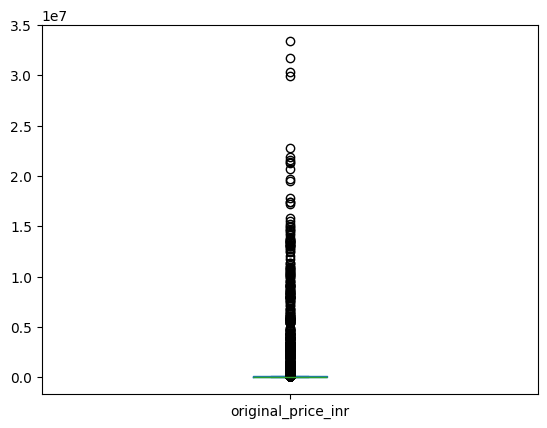

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,1.320000e+05
mean,7.941786e+04
std,4.202279e+05
min,1.075320e+03
25%,2.773085e+04
50%,4.125059e+04
75%,8.744426e+04
max,3.337169e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(87444.26), np.float64(27730.85))

In [50]:
IQR=Q3-Q1
IQR

np.float64(59713.409999999996)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-61839.26499999999), np.float64(177014.375))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
18,TXN_2022_00000019,2022-01-22,CUST_2017_00024869,PROD_000950,Apple iPhone 14 256GB White,Electronics,Smartphones,Apple,300375.00,29.49,211789.28,1,211789.28,0.0,211789.28,Kolkata,West Bengal,Metro,Premium,46-55,UPI,6,Standard,False,True,Republic Day Sale,4.000000,Delivered,1,2022,1,0.23,True,3.9
37,TXN_2022_00000038,2022-01-04,CUST_2022_00030328,PROD_001668,Alienware Gaming 8GB RAM Silver,Electronics,Laptops,Alienware,218988.47,0.00,218988.47,1,218988.47,0.0,218988.47,Vadodara,Gujarat,Tier2,Premium,46-55,Credit Card,4,Standard,False,False,NaN,5.000000,Delivered,1,2022,1,2.03,True,3.6
88,TXN_2022_00000089,2022-01-04,CUST_2022_00031874,PROD_000812,Apple iPhone 13 Pro Max 64GB Blue,Electronics,Smartphones,Apple,206459.08,0.00,206459.08,1,206459.08,NaN,206459.08,Bengaluru,Karnataka,Metro,Premium,46-55,UPI,1,Same Day,True,False,NaN,5.000000,Delivered,1,2022,1,0.23,True,4.7
90,TXN_2022_00000091,2022-01-28,CUST_2020_00006916,PROD_000006,Apple iPhone 6 16GB Blue,Electronics,Smartphones,Apple,216501.02,0.00,216501.02,1,216501.02,0.0,216501.02,Pune,Maharashtra,Tier1,Premium,46-55,UPI,4,Standard,False,False,NaN,5.000000,Delivered,1,2022,1,0.17,True,3.3
104,TXN_2022_00000105,2022-01-05,CUST_2022_00014972,PROD_001650,Alienware ThinkPad 8GB RAM Black,Electronics,Laptops,Alienware,186165.19,0.00,186165.19,1,186165.19,0.0,186165.19,Visakhapatnam,Andhra Pradesh,Tier2,Premium,NaN,UPI,2,Express,True,False,NaN,4.303778,Delivered,1,2022,1,1.24,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131863,TXN_2022_00131864,2022-12-09,CUST_2016_00014068,PROD_000484,Apple iPhone 11 256GB White,Electronics,Smartphones,Apple,198406.14,6.32,185872.03,1,185872.03,0.0,185872.03,Nagpur,Maharashtra,Tier1,Premium,18-25,Wallet,3,Standard,False,False,NaN,4.000000,Delivered,12,2022,4,0.19,True,3.9
131918,TXN_2022_00131919,NaT,CUST_2022_00029106,PROD_001985,Samsung OLED TV Deluxe,Electronics,TV & Entertainment,Samsung,223378.34,20.19,178271.36,1,178271.36,0.0,178271.36,Chennai,Tamil Nadu,Metro,Premium,26-35,UPI,3,Standard,True,False,NaN,4.303778,Delivered,12,2022,4,13.83,True,4.1
131930,TXN_2022_00131931,NaT,CUST_2015_00010783,PROD_000353,Apple iPhone XS Max 64GB White,Electronics,Smartphones,Apple,212444.94,0.00,212444.94,3,637334.82,0.0,637334.82,Bengaluru,Karnataka,Metro,Premium,36-45,UPI,7,Standard,False,False,NaN,5.000000,Delivered,12,2022,4,0.19,True,3.4
131959,TXN_2022_00131960,2022-12-03,CUST_2020_00047820,PROD_001622,Apple Gaming 8GB RAM Black,Electronics,Laptops,Apple,225117.00,0.00,225117.15,1,225117.15,0.0,225117.15,Delhi,Delhi,Metro,Premium,46-55,BNPL,1,Same Day,True,False,NaN,4.500000,Delivered,12,2022,4,1.27,False,3.4


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2022_00000001,2022-01-22,CUST_2022_00015913,PROD_000527,Samsung Galaxy A50 64GB White,Electronics,Smartphones,Samsung,26992.07,41.06,15909.72,1,15909.72,0.0,15909.72,Vadodara,Gujarat,Tier2,Standard,26-35,UPI,1,Same Day,True,True,Republic Day Sale,4.000000,Delivered,1,2022,1,0.20,False,4.2
1,TXN_2022_00000002,2022-01-11,CUST_2022_00021843,PROD_000979,Samsung Galaxy S22+ 128GB White,Electronics,Smartphones,Samsung,80105.77,0.00,80105.77,1,80105.77,0.0,80105.77,Chennai,Tamil Nadu,Metro,Standard,26-35,Net Banking,2,Express,True,False,NaN,4.303778,Delivered,1,2022,1,0.24,False,3.3
2,TXN_2022_00000003,NaT,CUST_2019_00043917,PROD_001909,Xiaomi Fitness Band Deluxe,Electronics,Smart Watch,Xiaomi,27516.92,0.00,27516.92,1,27516.92,0.0,27516.92,Delhi,Delhi,Metro,Standard,26-35,UPI,1,Same Day,True,False,NaN,4.000000,Delivered,1,2022,1,0.05,True,4.2
3,TXN_2022_00000004,2022-01-27,CUST_2022_00011696,PROD_000284,Xiaomi Mi A1 32GB White,Electronics,Smartphones,Xiaomi,38018.11,0.00,38018.11,3,114054.33,0.0,114054.33,Delhi,Delhi,Metro,Standard,18-25,UPI,1,Same Day,True,False,NaN,4.000000,Delivered,1,2022,1,0.24,True,4.6
4,TXN_2022_00000005,2022-01-16,CUST_2022_00030756,PROD_000556,OnePlus OnePlus 7T 64GB Gold,Electronics,Smartphones,OnePlus,87743.24,0.00,87743.24,1,87743.24,0.0,87743.24,Gorakhpur,Uttar Pradesh,Rural,Premium,18-25,Net Banking,1,Same Day,True,False,NaN,4.303778,Delivered,1,2022,1,0.18,True,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131994,TXN_2022_00131995,2022-12-13,CUST_2022_00015526,PROD_000003,Apple iPhone 6 64GB Black,Electronics,Smartphones,Apple,121870.70,24.30,92252.28,1,92252.28,0.0,92252.28,Pune,Maharashtra,Tier1,Standard,26-35,Credit Card,2,Express,True,False,NaN,4.303778,Delivered,12,2022,4,0.22,True,4.6
131995,TXN_2022_00131996,2022-12-09,CUST_2018_00025713,PROD_000295,Vivo V7 32GB Blue,Electronics,Smartphones,Vivo,39305.85,13.11,34151.51,1,34151.51,0.0,34151.51,Kanpur,Uttar Pradesh,Tier1,Standard,26-35,Credit Card,2,Express,True,False,NaN,5.000000,Delivered,12,2022,4,0.24,True,4.3
131996,TXN_2022_00131997,2022-12-26,CUST_2022_00011783,PROD_000088,Motorola Moto G (3rd Gen) 32GB White,Electronics,Smartphones,Motorola,12478.92,0.00,12478.92,1,12478.92,0.0,12478.92,Ahmedabad,Gujarat,Tier1,Budget,NaN,UPI,5,Standard,False,False,NaN,4.303778,Delivered,12,2022,4,0.18,True,3.9
131997,TXN_2022_00131998,2022-12-25,CUST_2021_00036849,PROD_001746,Realme Tab M10 4GB RAM Black,Electronics,Tablets,Realme,34319.65,0.00,34319.65,1,34319.65,NaN,34319.65,Bhubaneswar,Odisha,Tier2,Standard,26-35,Credit Card,2,Express,True,False,NaN,4.500000,Returned,12,2022,4,0.62,True,4.8


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['UPI', 'Net Banking', 'COD', 'BNPL', 'Wallet', 'Credit Card',
       'Debit Card'], dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['UPI', 'Online Banking', 'Cash', 'BNPL', 'Wallet', 'Card'],
      dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,12133
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
5472,0.0
50131,0.0
4896,0.0
107460,0.0
102248,0.0
15585,0.0
90576,0.0
84237,0.0
63440,NaN
118258,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(10130)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['26-35', '18-25', '36-45', '46-55', nan, '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-2', 'Group-1', 'Group-3', 'Group-4', nan, 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,12133
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,12133
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126714 entries, 0 to 131998
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          126714 non-null  object        
 1   order_date              114581 non-null  datetime64[ns]
 2   customer_id             126714 non-null  object        
 3   product_id              126714 non-null  object        
 4   product_name            126714 non-null  object        
 5   category                126714 non-null  object        
 6   subcategory             126714 non-null  object        
 7   brand                   126714 non-null  object        
 8   original_price_inr      126714 non-null  float64       
 9   discount_percent        126714 non-null  float64       
 10  discounted_price_inr    126714 non-null  float64       
 11  quantity                126714 non-null  int64         
 12  subtotal_inr            126714 non-

In [72]:
df.to_csv('cleaned_2022.csv')